 # Descripcion del proyecto
    Analizaremos los datos de una gran tienda en linea, junto con el equipo de marketing tenemos una lista de hipótesis que pueden ayudar a aumentar los ingresos. 
    
  **Objetivo:** Priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

## Lectura general de los datos

In [1]:
#importar librerias
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import scipy.stats as stats

In [2]:
# Realizamos lectura de datos 
df_hipotesis = pd.read_csv('/datasets/hypotheses_us.csv', sep=',')
df_hipotesis[['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort']] = df_hipotesis['Hypothesis;Reach;Impact;Confidence;Effort'].str.split(';', expand=True)

data_ordenes = pd.read_csv('/datasets/orders_us.csv')
data_visitas =  pd.read_csv('/datasets/visits_us.csv')

# Convertir en minusculas y renombrar el nombre de las columnas
data_ordenes.columns = data_ordenes.columns.str.lower()
df_hipotesis.columns = df_hipotesis.columns.str.lower()

# Cambiar el tipo de dato
df_hipotesis[['reach', 'impact', 'confidence', 'effort']] = df_hipotesis[['reach', 'impact', 'confidence', 'effort']].astype('int')



### Informacion general

In [3]:
data_ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionid  1197 non-null   int64  
 1   visitorid      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [4]:
# tenemos 62 filas
# igual cantidad de datos para A y B
# mes de agosto 2019
data_visitas.head(2)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619


In [5]:
#Tenemos 1197 filas
# grupo A 557
# grupo B 640
# todo el mes de agosto
# Hay dias que cojieron mas datos que otros
data_ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionid  1197 non-null   int64  
 1   visitorid      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [6]:
grupo_a = data_ordenes[data_ordenes['group'] == 'A']['visitorid']
grupo_b = data_ordenes[data_ordenes['group'] == 'B']['visitorid']


In [7]:
# Usuarios que están en ambos grupos
usuarios_en_ambos = pd.Series(list(set(grupo_a) & set(grupo_b)))

# Eliminar esos usuarios del DataFrame original
df_ordenes = data_ordenes[~data_ordenes['visitorid'].isin(usuarios_en_ambos)]
usuarios_en_ambos.head(2)

0    3957174400
1    3984495233
dtype: int64

grupo a 468 filas, usuarios unicos 445
grupo b 548 filas, usuarios unicos 528 

In [8]:
# Comprobamos si los datos del grupo A son los mismos del B
datos_duplicados = data_ordenes[data_ordenes['visitorid'].duplicated()]

#Cantidad de datos duplicados en el grupo A
datos_duplicados[datos_duplicados['group'] == 'A']

#Cantidad de datos duplicados en el grupo B
duplicados_b = datos_duplicados[datos_duplicados['group'] == 'B']

In [9]:
#Eliminamos duplicados

Comprobamos que del grupo A hay 557 visitantes y en el grupo B, 640 visitantes. Se verifico que en el grupo B hay 84 visitantes duplicados. Por lo tanto para que las muestras queden iguales se procede a eliminar los datos duplicados del grupo B.


### Realizamos una prueba de normalidad 

#### Grupo A

In [10]:
df_ordenes.head(2)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B


In [11]:
# filtramos los ingresos del grupo A
ganancias_a = df_ordenes[df_ordenes['group'] == 'A']['revenue']


In [12]:
#Realizamos la prueba de normalidad
alpha = .05 # nivel de significación

results = st.shapiro(ganancias_a)
p_value = results[1] # el segundo valor en la matriz de resultados (con índice 1) - el valor p

print('p-value: ', p_value)

if (p_value < alpha):
    print("Hipótesis nula rechazada: la distribución no es normal")
else:
    print("No se pudo rechazar la hipótesis nula: la distribución parece ser normal")


p-value:  2.7709587438572045e-31
Hipótesis nula rechazada: la distribución no es normal


#### Grupo B

In [13]:
# filtramos los ingresos del grupo A
ganancias_b = df_ordenes[df_ordenes['group'] == 'B']['revenue']

#Realizamos la prueba de normalidad

results = st.shapiro(ganancias_b)
p_value = results[1] # el segundo valor en la matriz de resultados (con índice 1) - el valor p

print('p-value: ', p_value)

if (p_value < alpha):
    print("Hipótesis nula rechazada: la distribución no es normal")
else:
    print("No se pudo rechazar la hipótesis nula: la distribución parece ser normal")

p-value:  4.203895392974451e-45
Hipótesis nula rechazada: la distribución no es normal


## parte 1 priorizar hipotesis

### Aplicar el framework ICE para priorizar hipótesis.

In [14]:

df_hipotesis['ICE'] = (
    df_hipotesis['impact']
    * df_hipotesis['confidence']
) / df_hipotesis['effort']
print(df_hipotesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


**Conclusion:**
    ICE da las hipotesis 8, 0, 7,6 como las mas prometedoras

### Aplicar el framework RICE para priorizar hipótesis.

In [15]:
df_hipotesis['RICE'] = (df_hipotesis['reach']*df_hipotesis['impact']*df_hipotesis['confidence'])/df_hipotesis['effort']
print(df_hipotesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


**Conclusión:** RICE da las hipoteisis 7, 2, 0,6 y 8 como las prometedoras

### cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE . Proporciona una explicación de los cambios.

En Ice, la hipotesis 8 estaba en primer porque es alto el numero de personas que afectará. En cambio en RICE la hipotesis 7 esta en primer lugar por que el impacto y la confianza es mayor a la hipotesis 8.

## Analisis del test A/B

### Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas

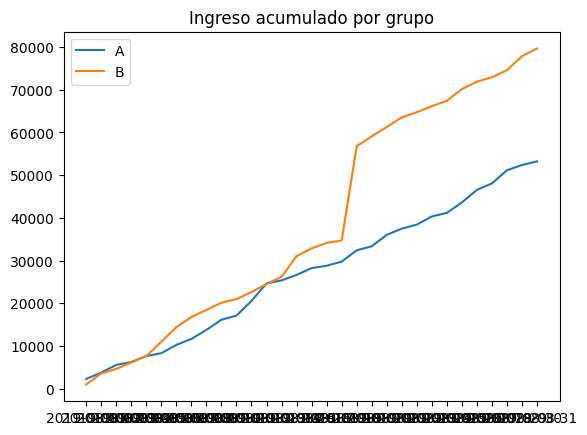

In [16]:
# crea una matriz con valores únicos de parejas fecha-grupo
datesGroups = df_ordenes[['date','group']].drop_duplicates()

#Vamos a recopilar en varios pasos los datos diarios acumulados agregados sobre pedidos
ordersAggregated = datesGroups.apply(lambda x: df_ordenes[np.logical_and(df_ordenes['date'] <= x['date'], df_ordenes['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# obtener los datos diarios acumulados agregados sobre los visitantes
datesGroup = data_visitas[['date','group']].drop_duplicates()
visitorsAggregated = datesGroup.apply(lambda x: data_visitas[np.logical_and(data_visitas['date'] <= x['date'], data_visitas['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

#  fusiona las dos tablas en una y da a sus columnas nombres descriptivos
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

#Creamos gráficos de ingresos acumulados por día y grupo

# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Trazar el gráfico de ingresos del grupo A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Trazar el gráfico de ingresos del grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Ingreso acumulado por grupo')
plt.legend()

**Conclusion:**  Los ingresos acomulados por grupo siguen en aumento, aunque es mayor para el grupo B. se ve reflejado un pico, quizas sean por valores atipicos

### Representación gráfica del tamaño de pedido promedio acumulado por grupo.

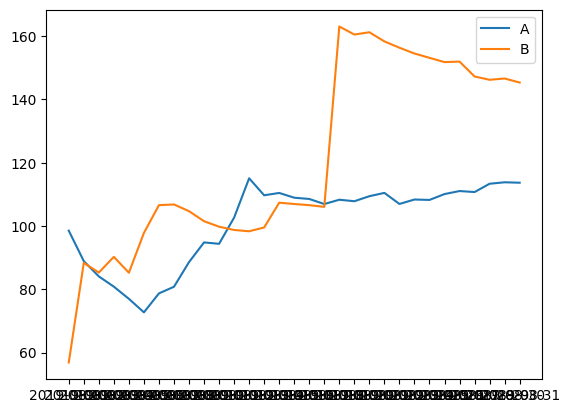

In [17]:
# Dividir los ingresos acumulados entre el número acumulado de pedidos
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()

**Conclusion:** El tamaño promedio de compra parece estabilizarse al final de la prueba para ambos grupos, pero para B parece estabilizarse

### Representación gráfica de la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. 

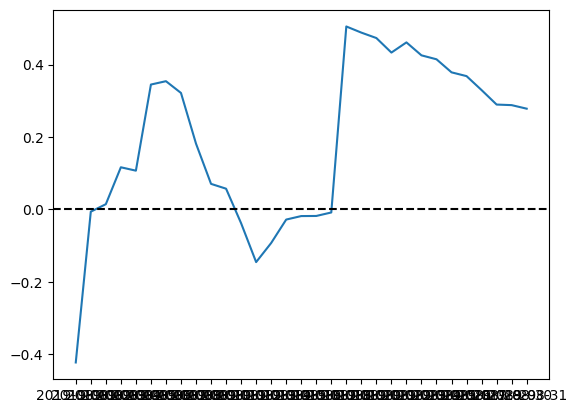

In [18]:
# reunir los datos en un DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# trazar un gráfico de diferencia relativa para los tamaños de compra promedio
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# agregar el eje X
plt.axhline(y=0, color='black', linestyle='--')

**Conclusión:** En varios puntos, la diferencia entre los segmentos aumenta. ¡Esto significa que deben haber algunos pedidos grandes y valores atípicos!

###  Representación gráfica de las tasas de conversión diarias de los dos grupos y describe la diferencia

(0.0, 31.0, 0.0, 0.15)

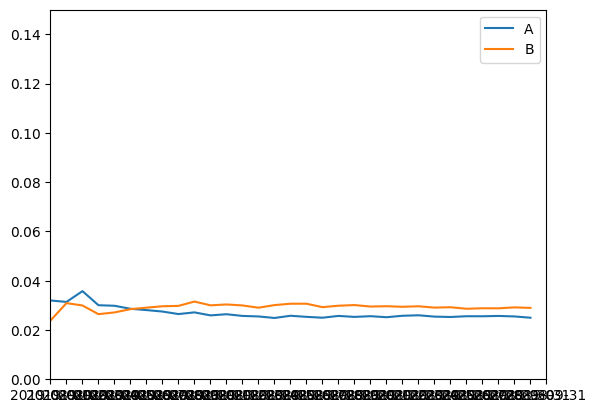

In [19]:
#Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día.

# calcular la conversión acumulada
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# seleccionar datos en el grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# seleccionar datos en el grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# trazar los gráficos
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# establecer la escala de los ejes
plt.axis(["2019-08-01", '2019-09-31', 0, 0.15])

**Conclusión:** La tasa de conversion en el grupo A al comienzo de la prueba aumento y luego antes de estabilizarse disminuyo. Contrario con el grupo B que antes de estabilizarse aumento.
- la tasa de conversión para B es mas alta que la de A

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Excelente visualización. La conclusión podría mejorarse especificando el porcentaje de diferencia final entre los grupos y discutiendo posibles razones para los patrones observados.
</div>

### Gráfico de dispersión del número de pedidos por usuario

Text(0.5, 1.0, ' Gráfico de dispersión del número de pedidos por usuario')

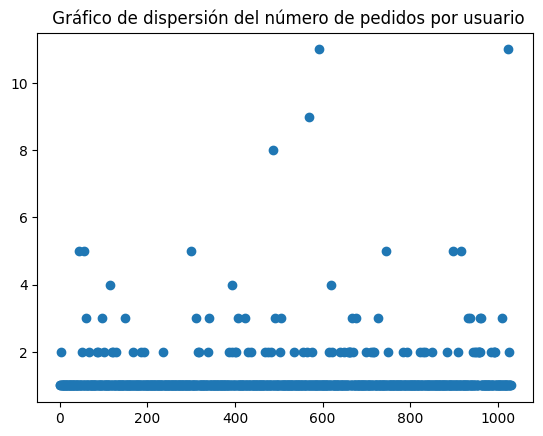

In [21]:
#Buscamos el numero de pedidos por usuario
ordersByUsers = (
    data_ordenes.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorid', 'transactionid']

# Grafico de dispersión
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['transactionid'])
plt.title(' Gráfico de dispersión del número de pedidos por usuario')

**Conclusion:** Con se esperaba hay valores atipicos.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Buena visualización para identificar valores atípicos. La conclusión es correcta pero muy breve. Cuantifica cuántos valores atípicos se observan y discute su posible impacto en el análisis.
</div>

### Calcular los percentiles

In [22]:
# Calcular los percentiles
print(np.percentile(ordersByUsers['transactionid'], [95, 99]))

[2. 4.]


**Conclusión:**
- No mas del 1% de los usuarios realizaron mas de cuatro pedidos
- No mas del 5% de los usuarios realizaron mas de 2 pedidos.

### Gráfico de dispersión de los precios de los pedidos

Text(0.5, 1.0, 'Grafico de dispersión de los ingresos de los pedidos')

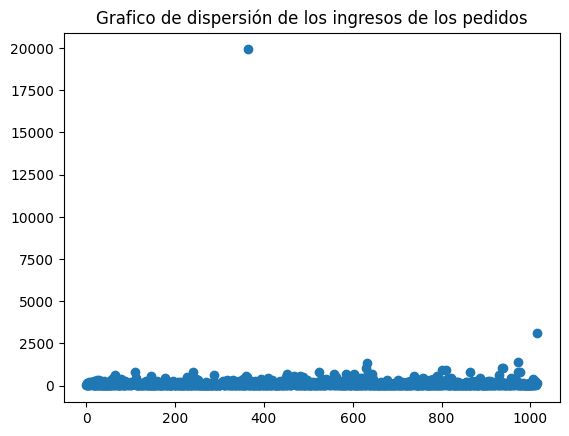

In [23]:
x_values = pd.Series(range(0, len(df_ordenes['revenue'])))
plt.scatter(x_values, df_ordenes['revenue'])
plt.title('Grafico de dispersión de los ingresos de los pedidos')

**Conclusión:** 

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Se realizó el gráfico correctamente, pero falta la conclusión. Es necesario describir la distribución observada, identificar valores atípicos y discutir sus implicaciones.
</div>

###  Percentiles 95 y 99 de los precios de los pedidos. 

In [24]:
# Calcular los percentiles
print(np.percentile(df_ordenes['revenue'], [95, 99]))

[414.275 830.3  ]


**Conclusión:** 
  - No mas del 1% de los ingresos por pedidos cuestan mas de 900.904

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Buen cálculo de los percentiles. La conclusión solo menciona el percentil 99, incluye también el 95. Compara estos valores con el precio promedio para dar más contexto.
</div>

###  Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. 

In [26]:
# En las variables almacenamos los usuarios con al menos un pedido, y la cantidad de pedidos.
ordersByUsersA = df_ordenes[df_ordenes['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'transactionid']

ordersByUsersB = df_ordenes[df_ordenes['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'transactionid']

# Usuarios de cada grupo con el numero de pedidos correspondiente
sampleA = pd.concat([ordersByUsersA['transactionid'],pd.Series(0, index=np.arange(data_visitas[data_visitas['group']=='A']['visits'].sum() - len(ordersByUsersA['transactionid'])), name='transactionid')],axis=0)

sampleB = pd.concat([ordersByUsersB['transactionid'],pd.Series(0, index=np.arange(data_visitas[data_visitas['group']=='B']['visits'].sum() - len(ordersByUsersB['transactionid'])), name='transactionid')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.011
0.160


**Conclusión:** 0.01 si hay diferencia estadísticamente significativa en la conversión entre los grupos, y la ganancia de 16% en el grupo B

### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto.

In [27]:
print('{0:.3f}'.format(stats.mannwhitneyu(df_ordenes[df_ordenes['group']=='A']['revenue'], df_ordenes[df_ordenes['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(df_ordenes[df_ordenes['group']=='B']['revenue'].mean()/df_ordenes[df_ordenes['group']=='A']['revenue'].mean()-1))

0.862
0.278


**Conclusión:**  El tamaño medio de los pedidos difiere entre los grupos. No obstante, el tamaño de pedido promedio para el grupo B es mucho más pequeño que para el grupo A.

In [35]:
# Encontrar el número total de usuarios anómalos
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['transactionid'] > 2]['visitorid'], ordersByUsersB[ordersByUsersB['transactionid'] > 2]['visitorid']], axis = 0)
usersWithExpensiveOrders = df_ordenes[df_ordenes['revenue'] > 2000]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

33       249864742
58       611059232
425     1920142716
1196    2108080724
211     2108163459
Name: visitorid, dtype: int64
(9,)


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Buen análisis estadístico. La conclusión señala correctamente la contradicción entre la falta de significancia estadística y la gran diferencia en promedios. Discute posibles razones para esta discrepancia.
</div>

### Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas

In [33]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['transactionid'],pd.Series(0, index=np.arange(data_visitas[data_visitas['group']=='A']['visits'].sum() - len(ordersByUsersA['transactionid'])),name='transactionid')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['transactionid'],pd.Series(0, index=np.arange(data_visitas[data_visitas['group']=='B']['visits'].sum() - len(ordersByUsersB['transactionid'])),name='transactionid')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


0.010
0.181


**Conclusion:** Ahora el valor p es .010 No hay diferencia significativa, aunque la conversion para B aumento

### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [41]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    df_ordenes[np.logical_and(
        df_ordenes['group']=='A',
        np.logical_not(df_ordenes['visitorid'].isin(abnormalUsers)))]['revenue'],
    df_ordenes[np.logical_and(
        df_ordenes['group']=='B',
        np.logical_not(df_ordenes['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    df_ordenes[np.logical_and(df_ordenes['group']=='B',np.logical_not(df_ordenes['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    df_ordenes[np.logical_and(
        df_ordenes['group']=='A',
        np.logical_not(df_ordenes['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.673
-0.091


Ahora la diferencia entre los grupos en de 9% en vez de 27%. No obstante el tamaño promedio es mas pequeño para B que para A.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Buen análisis comparativo. La conclusión señala correctamente el cambio en la diferencia entre grupos. Discute las implicaciones de este cambio y por qué podría haber ocurrido.
</div>

## conclusiones generales:

Aunque la diferencia significativa entre los grupos, no existe en ningun momento para la conversión,  se ve reflejado que la conversión es mayor para el grupo B.

la diferencia significativa entre los grupos con los datos procesados es de 9% en vez de 27% 

Embudo de ventas:

Se trabajo solo con datos de una semana debido a que el 99% de la información se encontraba alli.
El evento OffersScreenAppear es donde más usuarios abandonan (61.9%).
Solo el 47.7% de los usuarios completa el embudo de ventas hasta el pago exitoso.
No todos los usuarios siguen la ruta predestinada
Resultados del experimento:
No se encontraron diferencias estadísticas significativas entre los grupos de control y el grupo de prueba.
Las nuevas fuentes no generan un impacto positivo en la conversión, por lo que no se recomienda implementar este cambio.

Recomendaciones:
Optimizar la pantalla de ofertas y pago exitoso para retener más usuarios en esa etapa.

Priorizar otros cambios en el diseño o funcionalidad de la aplicación con mayor potencial de impacto
